<a href="https://colab.research.google.com/github/lavatus/CS114.L21/blob/main/Predict_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Machine Learning

## **I) Nguồn tham khảo**
* [Github lớp thứ 2](https://github.com/PhanTung-06/CS114.L21/blob/main/ProcessDataWecode/Dead24_05.ipynb)

## **II) Process data**


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wecode = pd.read_csv('/content/drive/MyDrive/Data/wecode.csv')
score_training = pd.read_csv('/content/drive/MyDrive/Data/score_training.csv')

In [100]:
wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [101]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [102]:
score_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [103]:
score_training.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,08.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [104]:
new_wecode = pd.DataFrame(wecode['user_id'])
new_wecode['Sum_Problems'] = pd.DataFrame(wecode['is_final'])
new_wecode.insert(2,'Sum_Submit', 1)
new_wecode['Sum_Correct_Submit'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
new_wecode['Sum_Correct_Problem'] =pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))
new_wecode.columns = ['id','Sum_Problems','Sum_Submit', 'Sum_Correct_Submit', 'Sum_Correct_Problem']
new_wecode = new_wecode.groupby(['id']).sum()

### Idea 1

In [105]:
# Tính tỉ lệ nộp bài đúng trên tổng số bài đã nộp
new_wecode['Idea1'] = new_wecode['Sum_Correct_Problem'] / new_wecode['Sum_Problems'] 

### Idea 2

In [106]:
new_wecode['Idea2'] = new_wecode['Sum_Submit'] / new_wecode['Sum_Correct_Problem']

In [107]:
new_wecode

,Sum_Problems,Sum_Submit,Sum_Correct_Submit,Sum_Correct_Problem,Idea1,Idea2
id,,,,,,
1,2,2,1,1,0.500000,2.000000
4,38,54,44,37,0.973684,1.459459
5,5,6,3,3,0.600000,2.000000
6,88,130,89,85,0.965909,1.529412
7,2,5,0,0,0.000000,inf
...,...,...,...,...,...,...
1860,48,76,29,28,0.583333,2.714286
1862,6,12,4,4,0.666667,3.000000
1864,63,187,30,28,0.444444,6.678571


## **III) Merge data**

In [108]:
CK = score_training[['id','CK']]

In [109]:
data_final = pd.merge(new_wecode, CK, on='id',how='outer')
data_final = data_final.dropna()

In [110]:
data_final

,id,Sum_Problems,Sum_Submit,Sum_Correct_Submit,Sum_Correct_Problem,Idea1,Idea2,CK
9,24,77.0,164.0,80.0,72.0,0.935065,2.277778,9.5
10,27,5.0,13.0,4.0,3.0,0.600000,4.333333,10
11,29,80.0,199.0,75.0,72.0,0.900000,2.763889,8.5
13,34,84.0,218.0,81.0,81.0,0.964286,2.691358,6.5
14,35,151.0,297.0,152.0,145.0,0.960265,2.048276,4.5
...,...,...,...,...,...,...,...,...
1151,1856,31.0,64.0,23.0,23.0,0.741935,2.782609,7.5
1152,1857,40.0,55.0,37.0,37.0,0.925000,1.486486,4
1153,1859,30.0,31.0,3.0,3.0,0.100000,10.333333,1.5
1155,1862,6.0,12.0,4.0,4.0,0.666667,3.000000,7.5


## **IV) Visualization**

In [115]:
data_plot = data_final.copy()
data_plot=data_plot.sort_values(by='CK', ascending=False)

### Sum Correct Problem dive Sum Problem and CK

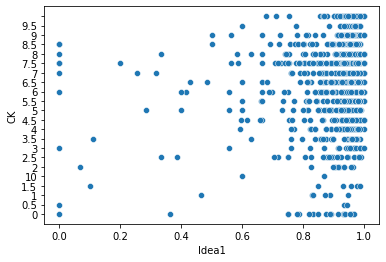

In [116]:
sns.scatterplot(x="Idea1", y="CK", data=data_plot)

### Sum Correct Problem and CK

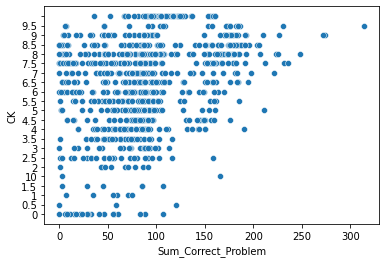

In [119]:
sns.scatterplot(x="Sum_Correct_Problem", y="CK", data=data_plot)

### Sum Submit dived Sum Correct Problem and CK

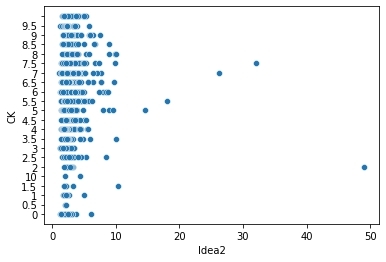

In [118]:
sns.scatterplot(x="Idea2", y="CK", data=data_plot)

### Sum Problem and CK

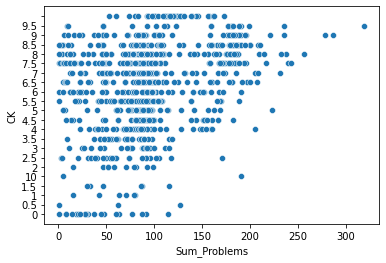

In [121]:
sns.scatterplot(x="Sum_Problems", y="CK",data=data_plot)